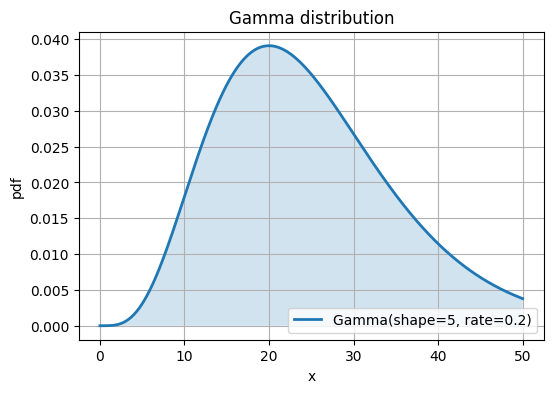

In [7]:
import scipy as sp
import numpy as np
import sympy as s
import matplotlib.pyplot as plt

def plot_gamma(shape, rate, x_max=None, n=500):
    """Plot Gamma distribution parameterized by shape and rate (rate = 1/scale)."""
    scale = 1.0 / rate
    if x_max is None:
        x_max = (shape + 5) * scale
    x = np.linspace(0, x_max, n)
    pdf = sp.stats.gamma.pdf(x, a=shape, scale=scale)
    plt.figure(figsize=(6,4))
    plt.plot(x, pdf, lw=2, label=f'Gamma(shape={shape}, rate={rate})')
    plt.fill_between(x, pdf, alpha=0.2)
    plt.xlabel('x'); plt.ylabel('pdf')
    plt.title('Gamma distribution')
    plt.legend(); plt.grid(True); plt.show()

# example usage:
plot_gamma(shape=5, rate=1/5)


In [ ]:
import numpy as np
from scipy.integrate import quad

mu = 5
def f(t, theta):
    # your density / integrand here
    
    return np.exp(-theta*t)  # example

theta = 2.5
val, err = quad(lambda t: f(t, theta), 0, np.inf)
print(val, err)

In [13]:
x,t = s.symbols('x t')
f = 1/(10*s.sqrt(2*s.pi*t))*s.exp(-(x-(100+5*t))**2/(200*t))*1/5*s.exp(-1/5*t)
s.integrate(f, (t, 0, s.oo))

Piecewise((-3.07692307692308*sqrt(2)*(0.00570087712549569*x - 0.285043856274785)*(-sqrt(pi)*sinh(0.0806225774829855*sqrt(polar_lift(50 - x))*sqrt(polar_lift(x**2/polar_lift(50 - x) + 200))) + sqrt(pi)*cosh(0.0806225774829855*sqrt(polar_lift(50 - x))*sqrt(polar_lift(x**2/polar_lift(50 - x) + 200))))*exp(x/20 - 5)/(sqrt(pi)*(50 - x)), Abs(arg(50 - x) + arg(x**2/polar_lift(50 - x) + 200)) <= pi/2), (Integral(sqrt(2)*exp(-0.2*t)*exp(-(-5*t + x - 100)**2/(200*t))/(100*sqrt(pi)*sqrt(t)), (t, 0, oo)), True))

NameError: name 't' is not defined

#Question 24

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import gamma

# Given parameters
R0 = 100.0
mu = 5.0
sigma = 10.0
lam = 1/5  # Exp rate (mean 5)

# Asymmetric-Laplace parameters for R
kappa = np.sqrt(mu**2 + 2*lam*sigma**2)
alpha = (kappa - mu) / sigma**2
beta  = (kappa + mu) / sigma**2
c = lam / kappa

def f_R(x):
    y = x - R0
    return c*np.exp(beta*y) if y < 0 else c*np.exp(-alpha*y)

def F_R(x):
    y = x - R0
    if y < 0:
        return (c/beta) * np.exp(beta*y)
    else:
        return c/beta + (c/alpha) * (1 - np.exp(-alpha*y))

# Claim size: Gamma(shape=5, rate=1/5) => scale = 5
shape = 5
scale = 5.0

def integrand(x):
    return f_R(x) * gamma.sf(x - 80.0, a=shape, scale=scale)  # survival P(C > x-80)

I, err = quad(integrand, 80.0, np.inf, limit=200)
p = F_R(80.0) + I

print("P(A < 80) =", p)
print("quad error estimate =", err)
